# Problem 1

Multiply by a smooth test function $v$ such that $v(0) = v(l) = 0$ and integrate by parts to get the variational formulation

$$
\int_0^lW'v' + cWv = \int_0^l fv
$$

where

$$
c = \frac{S}{D} \\
f(x) = \frac{q}{2D}x(l-x).
$$

The left side defines a bilinear form $a$ on $H_0^1(D)$ and the right side defines a linear form $F$ on $H_0^1(D)$.
This problem is well-posed due to Lax-Milgram with unique solution $W$.

Consider a partition of $D = (0,l)$ into $N$ evenly spaced subintervals $K_j = (x_j,x_{j+1})$ of size $h = l / N$.
Then $x_j = jh$ for all $j$.
Let $V_h$ be the space of all continuous piecewise linear polynomials on $D$ with respect to the $K_j$ that vanish at the boundary that vanish at the end points.
This is a finite dimensional subspace of $H_0^1(D)$, so there is a unique $W_h \in V_h$ such that $$a(W_h,v_h) = F(v_h)$$ for all $v_h \in V_h$.


The space $V_h$ has the following basis $\{\varphi_j\}_{j=1}^{N-1}$ where

$$
\varphi_j(x) = \begin{cases} (x - x_{j-1})/h & x \in (x_{j-1},x_j) \\ (x_{j+1} - x)/h & x \in (x_j,x_{j+1}) \\ 0 & \text{otherwise} \end{cases}
$$

With respect to this basis,

$$
W_h = \sum_{j=1}^{N-1}(\vec W_h)_j\varphi_j
$$

where $(\vec W_h)_j = W_h(x_j)$, and $\vec W_h$ is the unique solution to the matrix-vector problem

$$
A_h \vec W_h = \vec F_h
$$

where $$(A_h)_{i,j} = a(\varphi_j,\varphi_i) \quad 1 \leq i,j \leq N-1 \\ (\vec F_h)_i = F(\varphi_i) \quad 1 \leq i \leq N-1.$$
Therefore, if we assemble the matrix $A_h$ and the right-hand side $\vec F_h$, we can numerically solve the matrix equation to get the coefficients of the solution $W_h$ to the discrete problem.

To assemble $A_h$, we observe that

$$
(A_h)_{i,j} = \sum_{k=0}^{N-1}(A_h^k)_{i,j} \quad 1 \leq i,j \leq N-1
$$

where

$$(A_h^k)_{i,j} = \int_{K_k}\varphi_j'\varphi_i' + c\varphi_j\varphi_i \quad 1 \leq i,j \leq N-1$$

is the local contribution to $A_h$ from cell $K_k$.
We observe that, for $1 \leq k \leq N-2$, $K_k$ only has basis functions $\varphi_k$ and $\varphi_{k+1}$ that are nonzero on it, so $(A_h^k)_{i,j} = 0$ unless $i,j \in \{k,k+1\}$. Similarly, $K_0$ only has $\varphi_1$ nonzero on it, while $K_{N-1}$ only has $\varphi_{N-1}$.

Now we compute $(A_h^k)_{k,k+1}$, as the other entries are similar.
We let $\widehat K = (-1,1)$ and we let

$$
T_k(\widehat x) = \frac{x_k + x_{k+1}}{2} + \frac{x_{k+1}-x_k}{2}\widehat x \\
\widehat\varphi_0(\widehat x) = \frac{1 - \widehat x}{2} \\
\widehat\varphi_1(\widehat x) = \frac{1 + \widehat x}{2}.
$$

Then we have that

$$
  \varphi_k|_{K_k}(T_k(\widehat x)) = \widehat\varphi_0(\widehat x) \quad 1 \leq k \leq N-1\\
  \varphi_{k+1}|_{K_k}(T_k(\widehat x)) = \widehat \varphi_1(\widehat x) \quad 0 \leq k \leq N-2
$$

and, by the chain rule,

$$
\varphi_k'|_{K_k}(\widehat T_k(\widehat x))T_k'(\widehat x) = \widehat\varphi_0'(\widehat x) \quad 1 \leq k \leq N-1\\
\varphi_{k+1}'|_{K_k}(\widehat T_k(\widehat x))T_k'(\widehat x) = \widehat\varphi_1'(\widehat x). \quad 0 \leq k \leq N-2
$$

Therefore, after changing variables in the integration by setting $x = T_k(\widehat x)$, we have that

$$
(A_h^k)_{k,k+1} = \int_{-1}^1\left\{\widehat\varphi_1'T_k'^{-1}\widehat\varphi_0'T_k'^{-1} + c\widehat\varphi_1\widehat\varphi_0\right\}T_k' \quad 1 \leq k \leq N-2
$$

which we can compute approximately using quadrature points and weights on $\widehat K$ which can be found [here](https://en.wikipedia.org/wiki/Gaussian_quadrature):

$$
(A_h^k)_{k,k+1} \approx \sum_q \left\{\widehat\varphi_1'(\widehat x_q)T_k'(\widehat x_q)^{-1}\widehat\varphi_0'(\widehat x_q)T_k'(\widehat x_q)^{-1} + c \widehat \varphi_1(\widehat x_q)\widehat\varphi_0(\widehat x_q)\right\}T_k'(\widehat x_q)\widehat w_q \quad 1 \leq k \leq N-2
$$

where the $(\widehat x_q,\widehat w_q)$ are the quadrature points and weights.

The other nonzero entries of $A_h^k$ are computed similarly, as well as the special cases $k = 0$ and $k = N-1$. By looping over the elements $k$, computing only the nonzero entries in $A_h^k$, and adding them into the correct spots in the global matrix $A_h$, this assembles $A_h$.

We compute $\vec F_h$ by doing something similar.
We observe that

$$
(\vec F_h)_i = \sum_k (\vec F_h^k)_i
$$

where

$$
(\vec F_h^k)_i = \int_{K_k}f\varphi_i
$$

Similar to the previous case, $\vec F_h^k$ only has nonzero entries at possibly $i = k$ or $i = k+1$, so we compute only these by mapping back to the reference element and using quadrature.
For example

$$
(\vec F_h^k)_k \approx \sum_q f(T_k(\widehat x_q))\widehat\varphi_0(\widehat x_q)T_k'(\widehat x_q)\widehat w_q \quad 1 \leq k \leq N-1.
$$

Once we have $A_h$ and $\vec F_h$, we can solve for $\vec W_h$ using any numerical linear algebra solver.
Then since $(\vec W_h)_j = W_h(x_j)$, we can plot $W_h$ by plotting the points $(x_j,(\vec W_h)_j)$ for $1 \leq j \leq N-1$.

Now suppose that we also have a way to compute the exact solution $W$.
To compute the $L^2$ error between $W$ and $W_h$, we first observe that on element $K_k$,

$$
W_h|_{K_k} = (\vec W_h)_k\varphi_k|_{K_k} + (\vec W_h)_{k+1}\varphi_{k+1}|_{K_k} \quad 1 \leq k \leq N-2 \\
W_h|_{K_0} = (\vec W_h)_1\varphi_1|_{K_0} \\
W_h|_{K_{N-1}} = (\vec W_h)_{N-1}\varphi_{N-1}|_{K_{N-1}} \\
$$

We also observe that

$$
\|W - W_h\|_{L^2(D)}^2 = \sum_{k=0}^{N-1}\|W-W_h\|_{L^2(K_k)}^2 \\
\|W - W_h\|_{L^2(K_k)}^2 = \int_{K_k} |W - (\vec W_h)_k\varphi_k|_{K_k} - (\vec W_h)_{k+1}\varphi_{k+1}|_{K_k}|^2 \\ \approx \sum_q (W(T_k(\widehat x_q)) - (\vec W_h)_k\widehat\varphi_0(\widehat x_q) - (\vec W_h)_{k+1}\widehat \varphi_1(\widehat x_q))^2T_k'(\widehat x_q)\widehat w_q \quad 1 \leq k \leq N-2
$$
with similar formulas for $k = 0$ and $k = N-1$.

To get the $L^2$ error on the derivatives, we do essentially the same thing:
$$
\|W' - W'_h\|_{L^2(D)}^2 = \sum_{k=0}^{N-1}\|W'-W'_h\|_{L^2(K_k)}^2 \\
\|W' - W'_h\|_{L^2(K_k)}^2 = \int_{K_k} |W' - (\vec W_h)_k\varphi_k'|_{K_k} - (\vec W_h)_{k+1}\varphi_{k+1}'|_{K_k}|^2 \\ \approx \sum_q (W'(T_k(\widehat x_q)) - (\vec W_h)_k\widehat\varphi_0'(\widehat x_q)T_k'(\widehat x_q)^{-1} - (\vec W_h)_{k+1}\widehat \varphi_1'(\widehat x_q)T_k'(\widehat x_q)^{-1})^2T_k'(\widehat x_q)\widehat w_q \quad 1 \leq k \leq N-2
$$
with similar formulas for $k = 0$ and $k = N-1$.
Combining these gives us the $H^1$ error.

Finding the $L^\infty$ error is also similar:
$$
\|W - W_h\|_{L^\infty(D)} = \max_{k=0}^{N-1}\|W-W_h\|_{L^\infty(K_k)} \\
\|W - W_h\|_{L^\infty(K_k)} = \sup_{x\in K_k} |W(x) - (\vec W_h)_k\varphi_k|_{K_k}(x) - (\vec W_h)_{k+1}\varphi_{k+1}|_{K_k}(x)| \\ \approx \max_q |W(T_k(\widehat x_q)) - (\vec W_h)_k\widehat\varphi_0(\widehat x_q) - (\vec W_h)_{k+1}\widehat \varphi_1(\widehat x_q))| \quad 1 \leq k \leq N-2
$$
with similar formulas for $k = 0$ and $k = N-1$.

All of these errors should scale with the mesh size like $e(h) \approx C h^r$ for some constant $C$ and some exponent $r$ that we call the error rate.
To find the error rate, we run two simulations with mesh sizes $h_1 > h_2$ and get corresponding errors $e_1, e_2$. Then we can get an estimate $r_1$ on $r$ by setting

$$
r_1 = \frac{\log(e_1/e_2)}{\log(h_1/h_2)}.
$$

Doing this for successive simulations with mesh sizes $h_j$ and corresponding errors $e_j$, we can produce a sequence

$$
r_j = \frac{\log(e_j/e_{j+1})}{\log(h_j/h_{j+1})}.
$$

that should approximate $r$ well as the mesh sizes get smaller.

Here is a template to get started.
There may be bugs in it.
If you find any, let me know.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# problem parameters
q = 200
D = 8.8e7
l = 50
S = 100
f = lambda x: q / 2 / D * x * (l - x)

# write the exact solution yourself
W = lambda x: 0  # notice that the variable here is x, not t

# mesh info
N = 25
h = l / N
nodes = [j * h for j in range(N + 1)]
elements = [[nodes[j], nodes[j + 1]] for j in range(len(nodes) - 1)]

# linear system
A = np.zeros((N - 1, N - 1))
F = np.zeros(N - 1)

# quadrature info
quad_pts = [0, -np.sqrt(3 / 5), np.sqrt(3 / 5)]
quad_wts = [8 / 9, 5 / 9, 5 / 9]
integrate = lambda integrand: sum(
    [integrand(quad_pts[q]) * quad_wts[q] for q in range(len(quad_pts))]
)

# basis functions
basis = [lambda x: (1 - x) / 2, lambda x: (1 + x) / 2]
dbasis = [lambda x: -1 / 2, lambda x: 1 / 2]

# assembly
for k in range(1, len(elements) - 1):
    # local vectors and matrices
    Fk = np.zeros(len(basis))
    Ak = np.zeros((len(basis), len(basis)))

    # element info
    element = elements[k]
    x0 = element[0]
    x1 = element[1]

    # defining a function inside of a loop can lead to unexpected behavior in
    # python that involves something called late-binding closures
    # here is a link that explains this concept
    # https://docs.python-guide.org/writing/gotchas/#late-binding-closures
    # the point is that this is not a very good way to write this code but
    # for learning purposes this is sufficient
    refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
    dmap = lambda x: (x1 - x0) / 2

    # local assembly
    for i in range(len(basis)):
        F_integrand = lambda x: 0  # replace this
        Fk[i] = integrate(F_integrand)
        for j in range(len(basis)):
            A_integrand = lambda x: i + j  # replace this
            Ak[i, j] = integrate(A_integrand)

    # assemble to global system
    for i in range(len(basis)):
        F[k - 1 + i] += Fk[i]
        for j in range(len(basis)):
            A[k - 1 + i, k - 1 + j] += Ak[i, j]

# assemble the local entry for k = 0 yourself
F_integrand = lambda x: 0  # replace this
F[0] += integrate(F_integrand)  # replace this

A_integrand = lambda x: 0  # replace this
A[0, 0] += integrate(A_integrand)  # replace this

# also assemble k = N
F_integrand = lambda x: 0  # replace this
F[-1] += integrate(F_integrand)  # replace this

A_integrand = lambda x: 0  # replace this
A[-1, -1] += integrate(A_integrand)  # replace this

# solve
Wh = np.linalg.solve(A, F)

# plot
plt.plot(nodes[1:-1], Wh)
plt.show()

# look at pyplots documentation for how to save a plot

# or you can save the points as a list of x,y pairs to use in some other plotting software
# make sure you change the filename so you don't overwrite
plot_nodes = nodes[1:-1]
with open("data.txt", "w") as f:
    for j in range(len(plot_nodes)):
        f.write(",".join([str(plot_nodes[j]), str(Wh[j])]) + "\n")

# compute errors
L2_sq = 0
for k in range(1, len(elements) - 1):
    # element info
    element = elements[k]
    x0 = element[0]
    x1 = element[1]

    # defining a function inside of a loop can lead to unexpected behavior in
    # python that involves something called late-binding closures
    # here is a link that explains this concept
    # https://docs.python-guide.org/writing/gotchas/#late-binding-closures
    # the point is that this is not a very good way to write this code but
    # for learning purposes this is sufficient
    refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
    dmap = lambda x: (x1 - x0) / 2

    W0 = Wh[k - 1]
    W1 = Wh[k]
    L2_integrand = lambda x: (
        W(refmap(x)) - W0 * basis[0](x) - W1 * basis[1](x)
    ) ** 2 * dmap(x)
    L2_sq += integrate(L2_integrand)

# do the k = 0 and k = N-1 case yourself

# implement the H1 error and Linfinity errors yourself
H1_sq = 0
Linf = 0

# prints a comma separated line of the errors which can be put into a spreadsheet to compute error rates and produce tables
print(",".join([str(N), str(h), str(np.sqrt(L2_sq)), str(np.sqrt(H1_sq)), str(Linf)]))

Sometimes it is inconvenient to apply the boundary conditions at the same time as assembling the matrices. For example, it is annoying to handle the $k = 0$ and $k = N-1$ cases separately in the assembly loop above. Here below is a computational trick that allows us to separate assembly from application of boundary conditions.

Instead of writing our discrete solution
$$ W_h = \sum_{j=1}^{N-1} (\vec W_h)_j\varphi_j $$ we introduce the piecewise linear functions $$\varphi_0 = \begin{cases} \frac{x_1-x}{h} & x \in (x_0,x_1) \\ 0 & \text{otherwise} \end{cases}$$ and $$\varphi_N(x) = \begin{cases} \frac{x-x_{N-1}}{h} & x \in (x_{N-1},x_N) \\ 0 & \text{otherwise} \end{cases}$$ and write
$$W_h = \sum_{j=0}^N(\widetilde{\vec W_h})_j\varphi_j$$ with the coefficients being required to satisfy$$(\widetilde{\vec W_h})_0 = 0 = (\widetilde{\vec W_h})_N$$ and $$(\widetilde{\vec W_h})_j = (\vec W_h)_j \qquad j = 1,\dots,N-1$$

Now we assemble the *extended* $(N+1)\times(N+1)$ system $$\widetilde A_h\widetilde{\vec W_h} = \widetilde {\vec F_h}$$ where $$(\widetilde A_h)_{i,j} = \begin{cases} 1 & i = j \in \{0,N\} \\ (A_h)_{i,j} & i,j \in \{1,\dots,N-1\} \\ 0 & \text{otherwise}\end{cases}$$ and $$(\widetilde{\vec F_h})_i = \begin{cases} 0 & i \in \{0,N\} \\ (\vec F_h)_i & i \in\{1,\dots,N-1\}\end{cases}.$$

In block form, the system looks like
$$\begin{pmatrix} 1 & 0 & \cdots & 0 & 0 \\ 0 & (A_h)_{1,1} & \cdots & (A_h)_{1,N-1} & 0 \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ 0 & (A_h)_{N-1,1} & \cdots & (A_h)_{N-1,N-1} & 0 \\ 0 & 0 & \cdots & 0 & 1\end{pmatrix} \begin{pmatrix} (\widetilde{\vec W_h})_0 \\ (\widetilde{\vec W_h})_1 \\ \vdots \\ (\widetilde{\vec W_h})_{N-1} \\ (\widetilde{\vec W_h})_N \end{pmatrix} = \begin{pmatrix} 0 \\ (\vec F_h)_1 \\ \vdots \\ (\vec F_h)_{N-1} \\ 0 \end{pmatrix}$$

Notice that the first and last equation force the $0$th and $N$th coefficients to be zero, and the $(N-1) \times (N-1)$ subsystem involving coefficients $1$ through $N-1$ is exactly the system that we assembled previously. Now comes the computational trick, which proceeds in two steps:

1. Assemble the *unconstrained* system $$\widehat A_h \widetilde{\vec W_h} = \widehat{\vec F_h}$$ where $$(\widehat A_h)_{i,j} = a(\varphi_j,\varphi_i)$$ and $$(\widehat{\vec F_h})_i = \int_0^\ell f\varphi_i$$ for $i,j \in \{0,\dots,N\}$. Notice that this includes the indices $0$ and $N$ now. Also notice that for the element-wise assembly of $\widehat A_h$, we no longer have to treat the first element $K_0$ and the last element $K_{N-1}$ as special cases since we introduced the functions $\varphi_0$ and $\varphi_N$.
2. Apply the boundary conditions by replacing the first and last rows of the unconstrained system by the first and last rows of the extended system to get
$$\begin{pmatrix} 1 & 0 & \cdots & 0 & 0 \\ a(\varphi_0,\varphi_1) & (A_h)_{1,1} & \cdots & (A_h)_{1,N-1} & a(\varphi_N,\varphi_1) \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ a(\varphi_0,\varphi_1) & (A_h)_{N-1,1} & \cdots & (A_h)_{N-1,N-1} & a(\varphi_N,\varphi_{N-1}) \\ 0 & 0 & \cdots & 0 & 1\end{pmatrix} \begin{pmatrix} (\widetilde{\vec W_h})_0 \\ (\widetilde{\vec W_h})_1 \\ \vdots \\ (\widetilde{\vec W_h})_{N-1} \\ (\widetilde{\vec W_h})_N \end{pmatrix} = \begin{pmatrix} 0 \\ (\vec F_h)_1 \\ \vdots \\ (\vec F_h)_{N-1} \\ 0 \end{pmatrix}$$
Observe that this system is completely equivalent to the extended system (you can reduce this to the extended system by row reduction).

The code below shows how to implement this two step procedure. It is similar to the previous code template but is slightly simpler since we can remove the special cases.


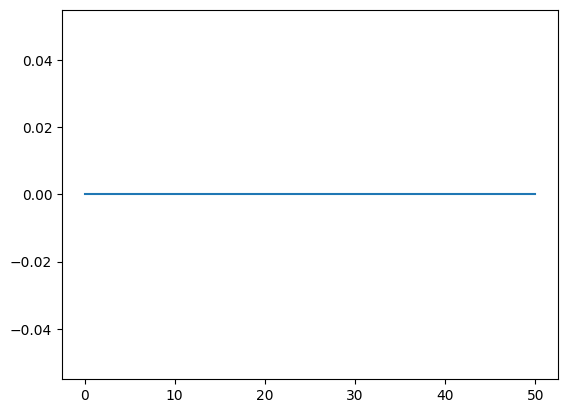

25,2.0,0.0,0.0,0


In [ ]:
def problems123():
  import numpy as np
  import matplotlib.pyplot as plt

  # problem parameters
  q = 200
  D = 8.8e7
  l = 50
  S = 100

  def f(x):
    return q / 2 / D * x * (l - x)

  # write the exact solution yourself
  def W(x): # notice that the variable here is x, not t
    return 0

  # mesh info
  N = 25
  h = l / N
  nodes = [j * h for j in range(N + 1)]
  elements = [[nodes[j], nodes[j + 1]] for j in range(len(nodes) - 1)]

  # extended linear system
  A = np.zeros((N + 1, N + 1))
  F = np.zeros(N + 1)

  # quadrature info
  quad_pts = [0, -np.sqrt(3 / 5), np.sqrt(3 / 5)]
  quad_wts = [8 / 9, 5 / 9, 5 / 9]
  def integrate(integrand): # integrate over reference interval [-1,1]
    return sum([integrand(quad_pts[q]) * quad_wts[q] for q in range(len(quad_pts))])

  # basis functions on [-1,1]
  basis = [lambda x: (1 - x) / 2, lambda x: (1 + x) / 2]
  dbasis = [lambda x: -1 / 2, lambda x: 1 / 2]

  # assembly of unconstrained system
  for k in range(len(elements)):
      # local vectors and matrices
      Fk = np.zeros(len(basis))
      Ak = np.zeros((len(basis), len(basis)))

      # element info
      element = elements[k]
      x0 = element[0]
      x1 = element[1]

      # defining a function inside of a loop can lead to unexpected behavior in
      # python that involves something called late-binding closures
      # here is a link that explains this concept
      # https://docs.python-guide.org/writing/gotchas/#late-binding-closures
      # the point is that this is not a very good way to write this code but
      # for learning purposes this is sufficient
      refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
      dmap = lambda x: (x1 - x0) / 2

      # local assembly
      for i in range(len(basis)):
          F_integrand = lambda x: 0  # replace this
          Fk[i] = integrate(F_integrand)
          for j in range(len(basis)):
              A_integrand = lambda x: i + j  # replace this
              Ak[i, j] = integrate(A_integrand)

      # assemble to global system
      for i in range(len(basis)):
          F[k + i] += Fk[i]
          for j in range(len(basis)):
              A[k + i, k + j] += Ak[i, j]

  # apply boundary constraints
  A[0,:] = 0
  A[0,0] = 1
  F[0] = 0

  A[-1,:] = 0
  A[-1,-1] = 1
  F[-1] = 0

  # solve
  Wh = np.linalg.solve(A, F)

  # plot
  plt.plot(nodes, Wh)
  plt.show()

  # look at pyplots documentation for how to save a plot

  # or you can save the points as a list of x,y pairs to use in some other plotting software
  # make sure you change the filename so you don't overwrite
  plot_nodes = nodes
  with open("data.txt", "w") as f:
      for j in range(len(plot_nodes)):
          f.write(",".join([str(plot_nodes[j]), str(Wh[j])]) + "\n")

  # this method also makes computing errors simpler
  L2_sq = 0
  for k in range(len(elements)):
      # element info
      element = elements[k]
      x0 = element[0]
      x1 = element[1]

      # defining a function inside of a loop can lead to unexpected behavior in
      # python that involves something called late-binding closures
      # here is a link that explains this concept
      # https://docs.python-guide.org/writing/gotchas/#late-binding-closures
      # the point is that this is not a very good way to write this code but
      # for learning purposes this is sufficient
      refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
      dmap = lambda x: (x1 - x0) / 2

      W0 = Wh[k]
      W1 = Wh[k+1]
      L2_integrand = lambda x: (
          W(refmap(x)) - W0 * basis[0](x) - W1 * basis[1](x)
      ) ** 2 * dmap(x)
      L2_sq += integrate(L2_integrand)

  # implement the H1 error and Linfinity errors yourself
  H1_sq = 0
  Linf = 0

  # prints a comma separated line of the errors which can be put into a spreadsheet to compute error rates and produce tables
  print(",".join([str(N), str(h), str(np.sqrt(L2_sq)), str(np.sqrt(H1_sq)), str(Linf)]))
  return

# Problem 2

Nothing changes here from problem 1.

# Problem 3

Changing the boundary condition to $W'(l) = 0$ only adds one more basis function (and thus another row and column) to the system. Specifically, you now have the extra basis function

$$\varphi_N(x) = \begin{cases} (x - x_{N-1})/h & x \in (x_{N-1},x_N) \\ 0 & \text{otherwise} \end{cases}$$

Modify the code accordingly to account for the extra basis function.

Alternatively, if you proceeded with the extended system approach, then you only need to apply the Dirichlet constraint at $x = 0$. Modify your code accordingly.

# Problem 4

Modify your problem parameters for this scenario. You should also modify your mesh to align with the discontinuities of $k$. This will no longer be an evenly spaced mesh, but that is okay. It will still be evenly spaced on the different pieces. You do not have to do this, however.
Finally, we have to lift the boundary condition at $x = 1$.
We do this as follows: pick a function $v$ that is $0$ at $x = 0$ and $4/\pi + 3/2$ at $x = 1$, for instance, $v(x) = (4/\pi + 3/2)x$.
Now we set $w = u - v$, so that $u = w + v$.
Then upon inserting $u$ into the ODE we get that $-(kw')' = f$ where $f = (kv')'$.
Furthermore, by how we constructed $v$, we have that $w(0) = w(1) = 0$.
Now we can approximate $w$ using the stuff we did in the previous problems to get $w_h$.
Then setting $u_h = w_h + v$ gives us an approximation to $u$.

Since $k$ is discontinuous, we must be careful by what we mean when we say $(-kw')' = (kv')'$. What we mean is that the weak formulation is to find $w \in H^1_0(0,1)$ such that $$\int_0^1kw'\varphi' = -\int_0^1kv'\varphi' := \int_0^1g\varphi'$$ for all $\varphi \in H_0^1(0,1)$. Observe that the right-hand side involves an integral with $\varphi'$ instead of $\varphi$, but that the right-hand side is still a continuous linear functional with respect to $\varphi \in H^1_0(0,1)$.
Also observe that the left side is a continuous and coercive linear functional on $H_0^1(0,1)$ thanks to the Poincare inequality and the fact that $k$ is strictly positive. Therefore, the weak formulation is well-posed, so we can discretize this weak formulation and proceed as usual.

If you choose *not* to modify your mesh with the discontinuities of $k$, then on some cells you will have to numerically integrate a discontinuous function. Doing so can be tricky, and a naive application of Gaussian quadrature will typically introduce a large quadrature error that will ruin your approximation.
Either find a more clever way to do the numerical integration or just choose your mesh correctly. I will proceed with the correct mesh approach.

The code template below will help you for this problem.

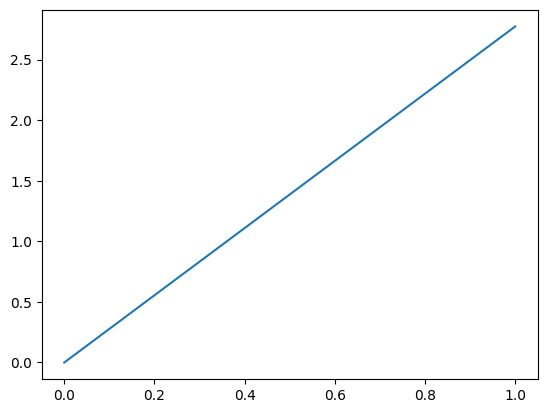

25,0.02094395102393204,1.5880212636808144,0.0,0


In [ ]:
def problem4():
    import numpy as np
    import matplotlib.pyplot as plt

    # problem parameters
    def k(x):
        if 0 <= x < np.pi / 6:
            return 1
        if np.pi / 6 <= x < np.pi / 4:
            return 2
        if np.pi / 4 <= x < 1:
            return 3
        return 0

    def u(x):  # write the exact solution yourself
        return 0

    def v(x):  # boundary lift
        return (4 / np.pi + 3 / 2) * x

    def g(x):  # rhs = -kv'
        return -k(x) * (4 / np.pi + 3 / 2)

    # now we align the mesh with the discontinuities
    discontinuities = [[0, np.pi / 6], [np.pi / 6, np.pi / 4], [np.pi / 4, 1]]
    # number of elements for each subinterval between the discontinuities
    # it doesn't matter if we are using more intervals than what is asked
    N = 25
    nodes = []
    for discontinuity in discontinuities:
        left = discontinuity[0]
        right = discontinuity[1]
        for i in range(N):  # add nodes from [left, right) excluding right
            nodes.append(left + i * (right - left) / N)
    nodes.append(1)

    # uncomment this to see what the mesh nodes look like
    # print(nodes)
    # plt.scatter(nodes,[0 for node in nodes])
    # plt.scatter([0, np.pi/6, np.pi/4, 1], [0,0,0,0],marker="x")
    # plt.show()
    # return

    elements = [[nodes[j], nodes[j + 1]] for j in range(len(nodes) - 1)]
    # the mesh size is generally defined as the largest length of an element,
    # which we will now compute
    h = 0
    for element in elements:
        h = max(h, element[1] - element[0])

    # we will use the 2 step procedure as explained above
    # the number of dofs corresponds to the number of nodes
    n_dofs = len(nodes)
    A = np.zeros((n_dofs, n_dofs))  # unconstrained
    F = np.zeros(n_dofs)  # unconstrained

    # quadrature info
    quad_pts = [0, -np.sqrt(3 / 5), np.sqrt(3 / 5)]
    quad_wts = [8 / 9, 5 / 9, 5 / 9]
    integrate = lambda integrand: sum(
        [integrand(quad_pts[q]) * quad_wts[q] for q in range(len(quad_pts))]
    )

    # basis functions
    basis = [lambda x: (1 - x) / 2, lambda x: (1 + x) / 2]
    dbasis = [lambda x: -1 / 2, lambda x: 1 / 2]

    # assembly
    for el in range(len(elements)):
        # local vectors and matrices
        Fk = np.zeros(len(basis))
        Ak = np.zeros((len(basis), len(basis)))

        # element info
        element = elements[el]
        x0 = element[0]
        x1 = element[1]

        # defining a function inside of a loop can lead to unexpected behavior in
        # python that involves something called late-binding closures
        # here is a link that explains this concept
        # https://docs.python-guide.org/writing/gotchas/#late-binding-closures
        # the point is that this is not a very good way to write this code but
        # for learning purposes this is sufficient
        refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
        dmap = lambda x: (x1 - x0) / 2
        refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
        dmap = lambda x: (x1 - x0) / 2

        # local assembly
        for i in range(len(basis)):
            F_integrand = lambda x: 0  # replace this
            Fk[i] = integrate(F_integrand)
            for j in range(len(basis)):
                A_integrand = lambda x: i + j  # replace this
                Ak[i, j] = integrate(A_integrand)

        # assemble to global system
        for i in range(len(basis)):
            F[el + i] += Fk[i]
            for j in range(len(basis)):
                A[el + i, el + j] += Ak[i, j]

    # apply boundary constraints
    A[0, :] = 0
    A[0, 0] = 1
    F[0] = 0

    A[-1, :] = 0
    A[-1, -1] = 1
    F[-1] = 0

    # solve for wh and then recover uh from wh
    wh = np.linalg.solve(A, F)
    uh = [wh[i] + v(nodes[i]) for i in range(len(nodes))]

    # plot
    plt.plot(nodes, uh)
    plt.show()

    # look at pyplots documentation for how to save a plot

    # or you can save the points as a list of x,y pairs to use in some other plotting software
    # make sure you change the filename so you don't overwrite
    plot_nodes = nodes
    with open("data.txt", "w") as file:
        for j in range(len(plot_nodes)):
            file.write(",".join([str(plot_nodes[j]), str(uh[j])]) + "\n")

    # compute errors
    L2_sq = 0
    for el in range(len(elements)):
        # element info
        element = elements[el]
        x0 = element[0]
        x1 = element[1]

        # defining a function inside of a loop can lead to unexpected behavior in
        # python that involves something called late-binding closures
        # here is a link that explains this concept
        # https://docs.python-guide.org/writing/gotchas/#late-binding-closures
        # the point is that this is not a very good way to write this code but
        # for learning purposes this is sufficient
        refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
        dmap = lambda x: (x1 - x0) / 2
        refmap = lambda x: (x0 + x1) / 2 + (x1 - x0) / 2 * x
        dmap = lambda x: (x1 - x0) / 2

        u0 = uh[el]
        u1 = uh[el+1]
        L2_integrand = lambda x: (
            u(refmap(x)) - u0 * basis[0](x) - u1 * basis[1](x)
        ) ** 2 * dmap(x)
        L2_sq += integrate(L2_integrand)

    # implement the H1 error and Linfinity errors yourself
    H1_sq = 0
    Linf = 0

    # prints a comma separated line of the errors which can be put into a spreadsheet to compute error rates and produce tables
    print(
        ",".join([str(N), str(h), str(np.sqrt(L2_sq)), str(np.sqrt(H1_sq)), str(Linf)])
    )
    return